In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
import gurobipy as gb
from gurobipy import GRB
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [ ]:
DataX = pd.read_csv("Feature_selected.csv",index_col=0)
DataY = pd.read_csv("Processed_data.csv")['Actual']

prices_df = pd.read_csv("Prices_processed.csv",index_col =0).round(2)
prices_train, prices_test = train_test_split(prices_df, test_size=0.25, shuffle = False)

In [ ]:
#3rd degree polynomial from the previous part:

X_train, X_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.25, shuffle=False) #Split into training and test sets

degree = 3 

poly = PolynomialFeatures(degree=degree,interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg = LinearRegression().fit(X_train_poly, y_train)
preds = reg.predict(X_test_poly)

#Check the accuracy of the model
#print('Score:',reg.score(X_train, y_train))
print('MSE (degree{0}):'.format(degree), np.round(mean_squared_error(y_test, preds), decimals=4))
print('R^2 (degree{0}):'.format(degree), np.round(r2_score(y_test, preds, force_finite=False), decimals=4))

MSE (degree3): 0.007
R^2 (degree3): 0.7663


# Lasso for 3rd degree polynomial

### Modification of the Non-Linear model to include L1 Regularization

In [ ]:
# Create a regression model with L1 regularization included (this is implementation is just here to manually test different values of alpha)

alpha = 0.01  # Regularization strength, adjust as needed
lasso_reg = Lasso(alpha=alpha) #Initialization of the Lasso regression

# Fit the model to our current polynomial
lasso_reg.fit(X_train_poly, y_train)


test_score = lasso_reg.score(X_test_poly, y_test)
print(f"Test R^2 Score: {test_score}")

Test R^2 Score: 0.5879035763059168


## Use of cross-validation to find the best value for alpha

In [ ]:
results = []
best_alpha = None
best_score = -np.inf  # Initialize with a low value

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 13) 
lasso_model = Lasso()

param_grid = { "fit_intercept" :[True,False],  "alpha": alphas}

lassoCV  = GridSearchCV(estimator = lasso_model, cv=TimeSeriesSplit(n_splits=5),param_grid = param_grid, return_train_score = True)
lassoCV.fit(X_train_poly, y_train)
best_lassoCV = lassoCV.best_estimator_


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.531e+00, tolerance: 1.450e-02
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+01, tolerance: 2.521e-02
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

In [ ]:
print(best_lassoCV)
y_pred_cv = best_lassoCV.predict(X_test_poly)
y_pred_cv1 = y_pred_cv 
print(r2_score(y_test,y_pred_cv))

Lasso(alpha=0.001)
0.7510126808022977


## Evaluation of the performance of the L1-regularized model with the best value for alpha on the testing dataset

In [ ]:
# Create a Lasso regression model with regularization parameter alpha
alpha = 0.001   # Implement the value of alpha previously found
lasso_reg = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = lasso_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print('Mean Absolute Error:', mae)

# Check the effect of regularization on feature penalization
print("Lasso Coefficients (with L1 regularization):")
lasso_coefs = lasso_reg.coef_
for feature, coef in enumerate(lasso_coefs):
    print(f"Feature {feature + 1}: {coef:.4f}")

Mean Squared Error (MSE): 0.007463940633697228
R-squared (R2) Score: 0.7510126808022977
Mean Absolute Error: 0.0681520089698071
Lasso Coefficients (with L1 regularization):
Feature 1: 0.0000
Feature 2: -0.0145
Feature 3: -0.0000
Feature 4: 0.8605
Feature 5: -0.0476
Feature 6: -0.1124
Feature 7: 0.1611
Feature 8: -0.0907
Feature 9: -0.0340
Feature 10: 0.3482
Feature 11: -0.0000
Feature 12: -0.0000
Feature 13: -0.0000
Feature 14: -0.0000
Feature 15: -0.0000
Feature 16: -0.0000
Feature 17: -0.0000
Feature 18: -0.0000
Feature 19: -0.0000
Feature 20: -0.0000
Feature 21: -0.0000
Feature 22: -0.0000
Feature 23: 0.0000
Feature 24: -0.0000
Feature 25: -0.0000
Feature 26: 0.0000
Feature 27: -0.0000
Feature 28: -0.0000
Feature 29: 0.0000
Feature 30: -0.0000
Feature 31: 0.0000
Feature 32: 0.0000
Feature 33: -0.0000
Feature 34: 0.0000
Feature 35: 0.0000
Feature 36: -0.0000
Feature 37: 0.0000
Feature 38: 0.0000
Feature 39: -0.0568
Feature 40: -0.0000
Feature 41: 0.0000
Feature 42: -0.0773
Feature 43

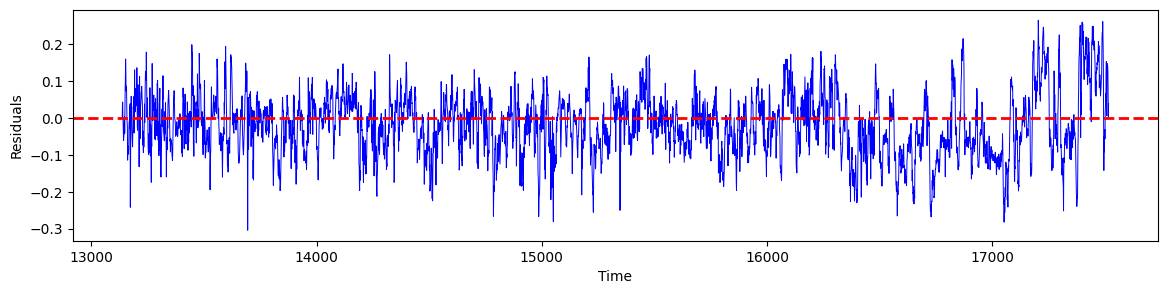

Under predicting: -187.7793161769758
Over predicting: 110.72648311077909


In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(14, 3))
plt.plot(y_test.index , residuals,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
#plt.title('Residual Plot using 3rd degree Polynomial Regression including L1 Regularization')
plt.show()
plt.show()

print('Under predicting:',sum(residuals[residuals<0]))
print('Over predicting:',sum(residuals[residuals>0]))

# Ridge for 3rd degree polynomial

## Modification of the Non-Linear model to include L2 Regularization

In [ ]:
# Create a regression model with L2 regularization included (this is implementation is just here to manually test different values of alpha)

alpha = 100  # Regularization strength, adjust as needed
ridge_reg = Ridge(alpha=alpha) #Initialization of the Lasso regression

# Fit the model to our current polynomial
ridge_reg.fit(X_train_poly, y_train)


test_score = ridge_reg.score(X_test_poly, y_test)
print(f"Test R^2 Score: {test_score}")

Test R^2 Score: 0.7276441340419573


## Use of cross-validation to find the best value for alpha

In [ ]:
results = []
best_alpha = None
best_score = -np.inf  # Initialize with a low value

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 13) 
ridge_model = Ridge()

param_grid = { "fit_intercept" :[True,False],  "alpha": alphas}

ridgeCV  = GridSearchCV(estimator = ridge_model, cv=TimeSeriesSplit(n_splits=5),param_grid = param_grid, return_train_score = True)
ridgeCV.fit(X_train_poly, y_train)
best_ridgeCV = ridgeCV.best_estimator_


In [ ]:
print(best_ridgeCV)
y_pred_cv = best_lassoCV.predict(X_test_poly)
y_pred_cv2 = y_pred_cv 
print(r2_score(y_test,y_pred_cv))

Ridge(alpha=10.0)
0.7510126808022977


## Evaluation of the performance of the L2-regularized model with the best value for alpha on the testing dataset

In [ ]:
# Create a Ridge regression model with regularization parameter alpha
alpha = 10  # Use the alpha found as being the best
ridge_reg = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = ridge_reg.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error", mae)

# Check the effect of regularization on feature penalization
print("Ridge Coefficients (with L2 regularization):")
ridge_coefs = ridge_reg.coef_
for feature, coef in enumerate(ridge_coefs):
    print(f"Feature {feature + 1}: {coef:.4f}")

Mean Squared Error (MSE): 0.0071856470746783935
R-squared (R2) Score: 0.7602961907618033
Mean Absolute Error 0.06568410560030798
Ridge Coefficients (with L2 regularization):
Feature 1: 0.0000
Feature 2: -0.0473
Feature 3: 0.0755
Feature 4: 0.5813
Feature 5: -0.1377
Feature 6: -0.0702
Feature 7: 0.4033
Feature 8: -0.1457
Feature 9: -0.0766
Feature 10: 0.3877
Feature 11: -0.0029
Feature 12: 0.0143
Feature 13: -0.0279
Feature 14: -0.0000
Feature 15: -0.0195
Feature 16: -0.0046
Feature 17: -0.0228
Feature 18: -0.0279
Feature 19: 0.0094
Feature 20: 0.0233
Feature 21: -0.0129
Feature 22: 0.1038
Feature 23: 0.0479
Feature 24: -0.0055
Feature 25: -0.0466
Feature 26: 0.0322
Feature 27: -0.0003
Feature 28: -0.0076
Feature 29: -0.0034
Feature 30: 0.0409
Feature 31: 0.1466
Feature 32: 0.1204
Feature 33: 0.0505
Feature 34: 0.1210
Feature 35: 0.0428
Feature 36: 0.0148
Feature 37: 0.1351
Feature 38: 0.1637
Feature 39: -0.0823
Feature 40: -0.0569
Feature 41: -0.0066
Feature 42: -0.1363
Feature 43: -0.

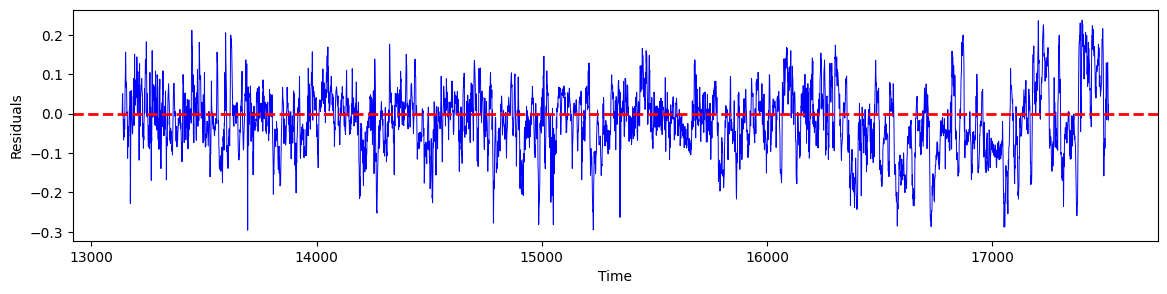

Under predicting: -184.04879309169033
Over predicting: 103.64758943765865


In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(14, 3))
plt.plot(y_test.index , residuals,lw=0.7, c='b')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
#plt.title('Residual Plot using 3rd degree Polynomial Regression including L2 Regularization')
plt.show()
plt.show()

print('Under predicting:',sum(residuals[residuals<0]))
print('Over predicting:',sum(residuals[residuals>0]))

# Revenue Calculation

In [ ]:
def Optimization_wind(Windspeed,prices):
    #Windspeed = Windspeed.to_numpy()
    Time = len(Windspeed)
    T = range(Time)

    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    Capacity = 1 

    psi_up= Up_prices -DA_prices
    psi_down = DA_prices- Down_prices

    model_opt = gb.Model("Step1_A")
    p_DA_A = model_opt.addVars(Time,lb=0)
    p_delt = model_opt.addVars(Time,lb=-gb.GRB.INFINITY,ub=gb.GRB.INFINITY)

    p_E_up = model_opt.addVars(Time,lb =-1,ub=0)
    p_E_down = model_opt.addVars(Time,lb =0,ub=1)

    model_opt.setObjective(
    gb.quicksum(p_DA_A[t]*DA_prices[t] 
            + (Up_prices[t] *  p_E_up[t] + Down_prices[t] *  p_E_down[t]) for t in T )
            ,gb.GRB.MAXIMIZE)

    
    model_opt.addConstrs(
    (p_DA_A[t] <= Capacity
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == Windspeed[t]-p_DA_A[t]
    for t in T
    )
    )

    model_opt.addConstrs(
    (
    p_delt[t] == p_E_up[t] + p_E_down[t]
    for t in T
    )
    )

    model_opt.setParam('OutputFlag', False )
    model_opt.optimize()
    if model_opt.status == GRB.OPTIMAL:
        obj_val =  model_opt.objVal 
        print("Revenue =", "{:.2f}".format(model_opt.objVal))
        print("Offering Strategy =", ["{:.2f}".format(p_DA_A[t].x) for t in T])
        print("Imbalance Power =", ["{:.2f}".format(p_delt[t].x) for t in T])
        print("Real Power  =", ["{:.2f}".format(Windspeed[t]) for t in T])
        P_DA = [p_DA_A[t].x for t in T]
        obj_vals_hour ={t: p_DA_A[t].x*DA_prices[t] - (Up_prices[t] *  p_E_up[t].x + Down_prices[t] *  p_E_down[t].x) for t in T }

        p_E_up_list =[p_E_up[t].x for t in T]
        p_E_down_list = [p_E_down[t].x for t in T]


    else:
        print("Optimization was not successful")

    return P_DA,obj_val,obj_vals_hour,p_E_up_list,p_E_down_list

In [ ]:
def balancing_revenue(P_DA_bid, real_wind, prices):
    """
    Inputs: 
    P_DA_bid = The Day ahead bids that have been made by optimization program at time t 
    real_wind = The actual power produced by wind turbine at time t         
    prices = The prices time 


    Calculates the result of our day ahead bids based on our wind forecast 

    Outputs: 
    Revenue: The actual revenue by our prediction of day ahead bids
    p_up: The upregulation power needed to be provided
    p_down: The downregulation power able to provided 

    """
    Time = len(P_DA_bid)
    T = range(Time)
    real_wind = real_wind.values
    DA_prices = prices["SpotPriceEUR"].to_numpy()
    Up_prices = prices["Up-regulating_price"].to_numpy()
    Down_prices = prices["Down-regulating_price"].to_numpy()
    p_up = np.empty(Time)
    p_down = np.empty(Time)
 
    for t in T:
        
        
        if real_wind[t] <= P_DA_bid[t] :
            p_up[t] = real_wind[t] -P_DA_bid[t]
        else:
            p_up[t] = 0
        if real_wind[t] >= P_DA_bid[t] :
            p_down[t] = real_wind[t] - P_DA_bid[t]
        else:
            p_down[t] = 0
    
    Revenue = np.dot(P_DA_bid,DA_prices) + np.dot(p_up,Up_prices) + np.dot(p_down,Down_prices)   
    
    return Revenue, p_up,p_down

In [ ]:
DataY_vals = y_pred_cv1
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M1_P_DA_vals,M1_obj_val, M1_obj_vals_hour,M1_p_E_up_list,M1_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M1_Revenue, M1_p_up, M1_p_down = balancing_revenue(M1_P_DA_vals, y_test, prices_test)

Revenue = 531007.41
Offering Strategy = ['1.00', '0.21', '1.00', '0.24', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.27', '0.22', '0.21', '0.27', '0.21', '1.00', '0.00', '0.22', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.28', '0.00', '0.00', '0.26', '0.25', '0.00', '0.35', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.40', '0.39', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.00', '0.26', '0.27', '0.23', '0.21', '0.19', '0.23', '1.00', '0.27', '0.30', '0.32', '0.28',

In [ ]:
M1_Revenue

500171.3389025066

In [ ]:
DataY_vals = y_pred_cv2
# Change values to be between 0 and 1 at min and max
DataY_vals[DataY_vals<0] =0
DataY_vals[DataY_vals>1] =1
M2_P_DA_vals,M2_obj_val, M2_obj_vals_hour,M2_p_E_up_list,M2_p_E_down_list = Optimization_wind(DataY_vals,prices_test)
M2_Revenue, M2_p_up, M2_p_down = balancing_revenue(M2_P_DA_vals, y_test, prices_test)

Revenue = 531007.41
Offering Strategy = ['1.00', '0.21', '1.00', '0.24', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.27', '0.22', '0.21', '0.27', '0.21', '1.00', '0.00', '0.22', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '1.00', '0.28', '0.00', '0.00', '0.26', '0.25', '0.00', '0.35', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.40', '0.39', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.00', '0.00', '0.26', '0.27', '0.23', '0.21', '0.19', '0.23', '1.00', '0.27', '0.30', '0.32', '0.28',

In [ ]:
M2_Revenue

500171.3389025066

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538942fa-4593-4d1a-b90d-2d23669fe78c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>